<a href="https://colab.research.google.com/github/ffathy-tdx/MPG-Data-Analysis/blob/main/FinalDSProjectmpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the dataset
The miles per gallon (MPG) dataset is a valuable resource for analyzing the fuel efficiency of various automobiles. It contains information on different car models, their attributes, and their corresponding fuel efficiency measured in miles per gallon. This dataset is particularly interesting as it allows us to explore the factors that influence fuel consumption and identify trends in automotive technology over time. By studying this dataset, we can gain insights into the relationship between car specifications and their MPG ratings, ultimately contributing to the development of more efficient and sustainable transportation solutions.

 ---------------------


Dataset link: [Auto MPG Dataset](https://www.kaggle.com/datasets/uciml/autompg-dataset)

Github Repository: [Link to GitHub Repository](https://github.com/ffathy-tdx/MPG-Data-Analysis/)

**1. Title: Auto-Mpg Data**	
				
**2. Sources:**				
   (a) Origin:  This dataset was taken from the StatLib library which is     maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.				
   (b) Date: July 7	1993			
				
**3. Past Usage:**				
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.		
				
**4. Relevant Information:**				
				
This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
      to be predicted in terms of 3 multivalued discrete and 5 continuous
     attributes." (Quinlan, 1993)			
				
**5. Number of Instances:** 398			
				
**6. Number of Attributes:** 9 including the class attribute		
				
**7. Attribute Information:**			
				
    1. mpg:           continuous				
    2. cylinders:     multi-valued discrete				
    3. displacement:  continuous				
    4. horsepower:    continuous				
    5. weight:        continuous				
    6. acceleration:  continuous				
    7. model year:    multi-valued discrete				
    8. origin:        multi-valued discrete				
    9. car name:      string (unique for each instance)				
				
**8. Missing Attribute Values:**  horsepower has 6 missing values				

 ---------------------



#Loading Libraries and Importing Data


---



In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(url)

df.sample(5)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
366,28.0 4 112.0 88.00 2605. 19...
15,18.0 6 199.0 97.00 2774. 15...
288,16.9 8 350.0 155.0 4360. 14...
216,30.0 4 111.0 80.00 2155. 14...
248,19.9 8 260.0 110.0 3365. 15...




---


#Exploratory Data Analysis (EDA)


---



Fixing the column names and displaying the first 15 records of the dataset



In [3]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

df = pd.read_csv(url, names=column_names, na_values='?',sep='\s+', skipinitialspace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


A summary of the central tendency, dispersion, and distribution of the numerical data.



In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


 Information about the data types, column names, and the number of non-null values in each column.



In [5]:
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu

In [6]:
df['cylinders']

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64

sorting data ascendingly based on the cylinders column 

In [7]:
df_sorted_asc = df.sort_values('cylinders')
df_sorted_asc.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
111,18.0,3,70.0,90.0,2124.0,13.5,73,3,maxda rx3
71,19.0,3,70.0,97.0,2330.0,13.5,72,3,mazda rx2 coupe
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs
243,21.5,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4
267,27.5,4,134.0,95.0,2560.0,14.2,78,3,toyota corona


sorting data descendingly based on the cylinders column

In [8]:
df_sorted_desc = df.sort_values('cylinders', ascending = False)
df_sorted_desc.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
86,14.0,8,304.0,150.0,3672.0,11.5,73,1,amc matador
230,15.5,8,350.0,170.0,4165.0,11.4,77,1,chevrolet monte carlo landau
231,15.5,8,400.0,190.0,4325.0,12.2,77,1,chrysler cordoba
232,16.0,8,351.0,149.0,4335.0,14.5,77,1,ford thunderbird


mapping the numerical 'origin' codes (1, 2, 3) to their corresponding continents ('America', 'Europe', 'Asia'), which can be seen as a decoding operation.

In [9]:
df['continent'] = df['origin'].map({1: 'America', 2: 'Europe', 3: 'Asia'})
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,continent
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,America
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,America
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,America
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,America


after the mapping operation is done, now we can select the categorical data of column 'continet' and get the count of each class

In [10]:
cat_class_counts = df['continent'].value_counts()
cat_class_counts

America    249
Asia        79
Europe      70
Name: continent, dtype: int64



---


#Data cleaning


---



creating a correlation heatmap is a useful step in exploratory data analysis, feature selection, and understanding the relationships between variables in the dataset.

<ipython-input-11-5013387ef3f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


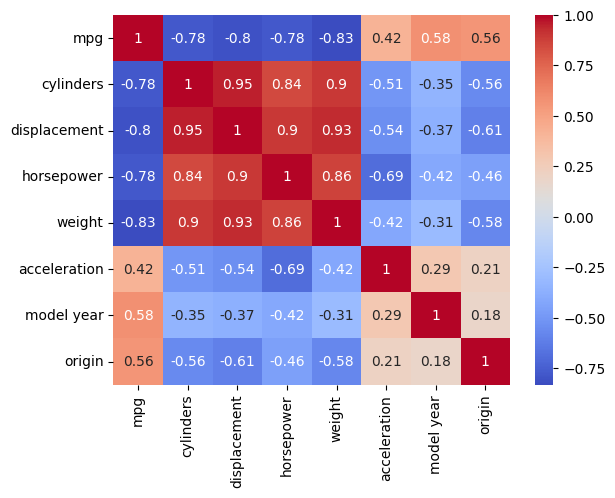

In [11]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

plt.show()



---


#Dropping Unnecessary Columns


---



In [12]:
df.drop(['car name'], axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,continent
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,America


#Renaming the origin column

In [13]:
df.rename(columns={'origin': 'origin_code'}, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_code,continent
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,America




---


#Handling Missing Data


---



In [14]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin_code     0
continent       0
dtype: int64

In [15]:
df.dropna(subset = ['horsepower'], inplace=True)
#df.dropna(inplace=True) 

df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin_code     0
continent       0
dtype: int64

In [16]:
df.sample(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_code,continent
150,26.0,4,108.0,93.0,2391.0,15.5,74,3,Asia
54,35.0,4,72.0,69.0,1613.0,18.0,71,3,Asia
78,21.0,4,120.0,87.0,2979.0,19.5,72,2,Europe
180,25.0,4,121.0,115.0,2671.0,13.5,75,2,Europe
167,29.0,4,97.0,75.0,2171.0,16.0,75,3,Asia
50,28.0,4,116.0,90.0,2123.0,14.0,71,2,Europe
235,26.0,4,97.0,75.0,2265.0,18.2,77,3,Asia
357,32.9,4,119.0,100.0,2615.0,14.8,81,3,Asia
216,31.5,4,98.0,68.0,2045.0,18.5,77,3,Asia
151,31.0,4,79.0,67.0,2000.0,16.0,74,2,Europe


#Finding and Removing Duplicate Values


In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0



---


#Data Visualization:

---




#Bar plot: to visualize the distribution of car models from different continents.

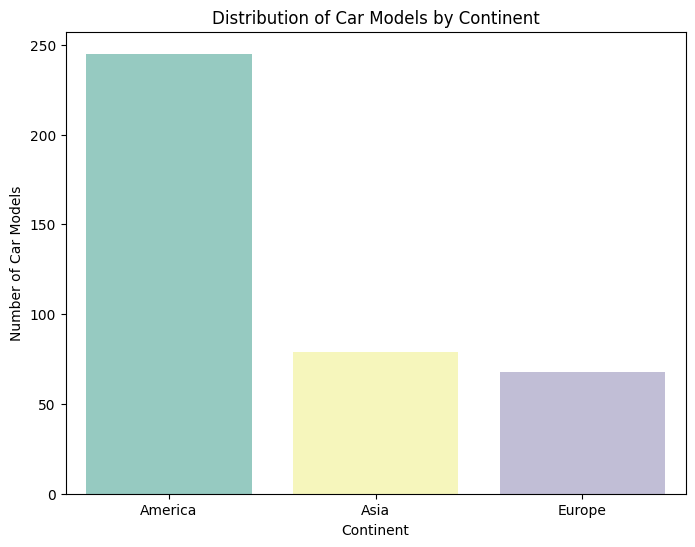

In [19]:
continent_counts = df['continent'].value_counts()

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='Set3')
plt.xlabel('Continent')
plt.ylabel('Number of Car Models')
plt.title('Distribution of Car Models by Continent')
#plt.legend(title='Continent', labels=continent_counts.index)
plt.show()


#Box Plot: To visualize the distribution of a numerical variable across different continents.

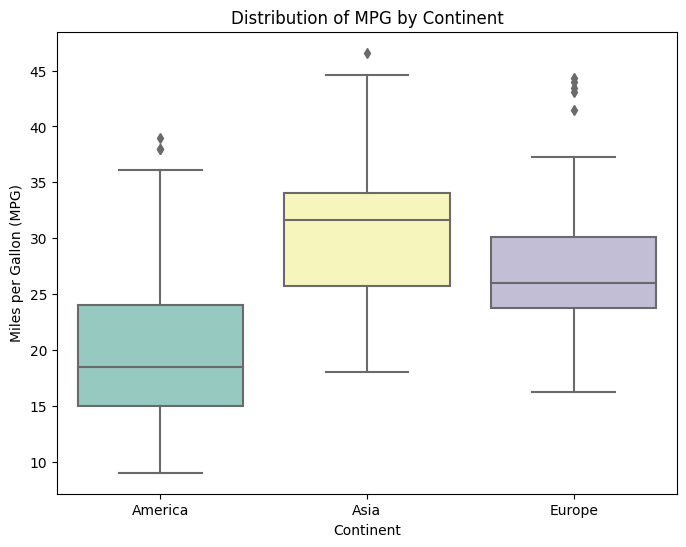

In [20]:
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='continent', y='mpg', data=df, palette='Set3')
plt.xlabel('Continent')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('Distribution of MPG by Continent')
#plt.legend(title='Continent', labels=df['continent'].unique())
plt.show()


#Histogram: To visualize the distribution of a numerical variable.
This histogram plot provides a discrete representation of the data, while the KDE plot offers a continuous representation of the distribution (represents PDF). This combined visualization helps in exploring the weight distribution of the cars in the dataset.

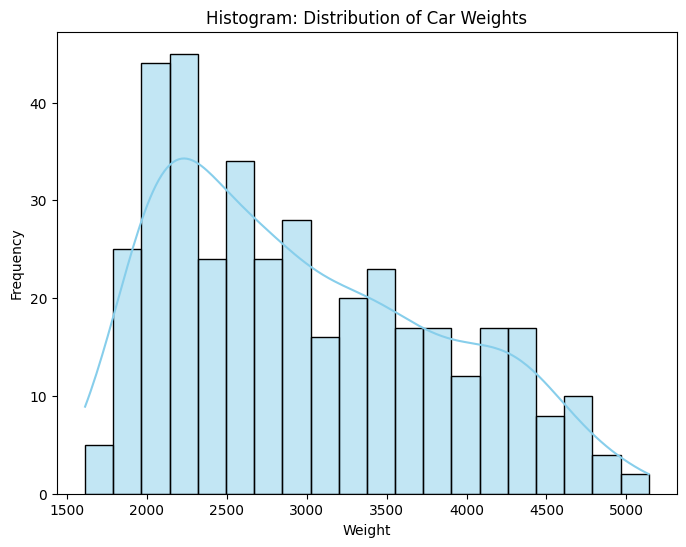

In [21]:
plt.figure(figsize=(8, 6))
histogram = sns.histplot(data=df, x='weight', bins=20, kde=True, color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Car Weights')
#plt.legend(title='Distribution')
plt.show()


#Bar Plot: To visualize the average MPG for each number of cylinders.

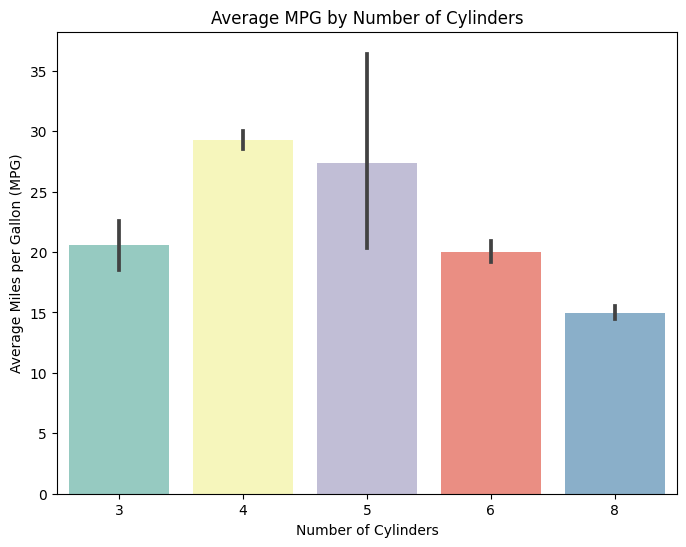

In [22]:
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='cylinders', y='mpg', data=df, palette='Set3')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Miles per Gallon (MPG)')
plt.title('Average MPG by Number of Cylinders')
#plt.legend(title='Number of Cylinders', labels=df['cylinders'].unique())
plt.show()


#Scatter Plot: To visualize the relationship between MPG and horsepower.

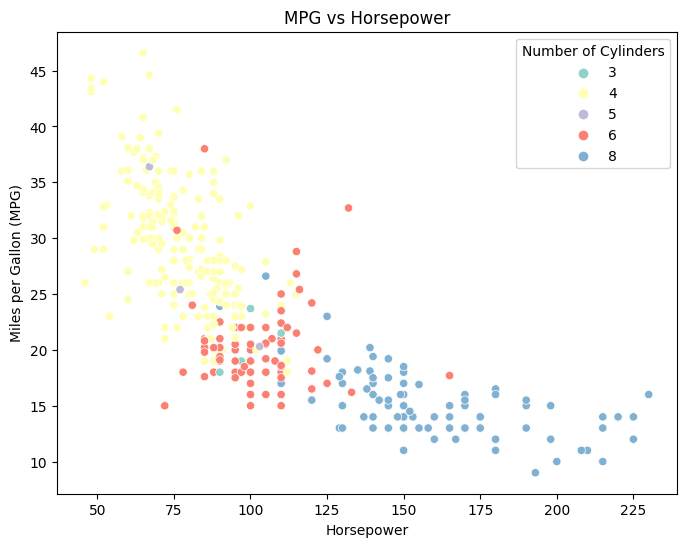

In [23]:
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(x='horsepower', y='mpg', data=df, hue='cylinders', palette='Set3')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('MPG vs Horsepower')
plt.legend(title='Number of Cylinders')
plt.show()


#Scatter plot: To visualize the relationship between MPG (miles per gallon) and weight.

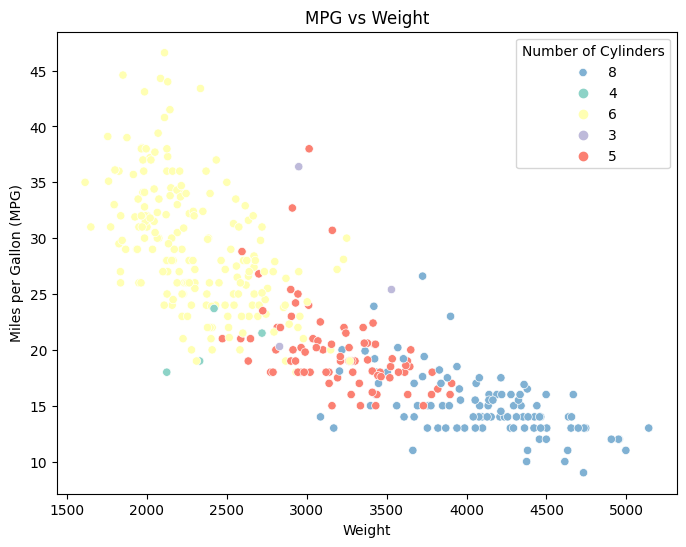

In [24]:
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(x='weight', y='mpg', data=df, hue='cylinders', palette='Set3')
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('MPG vs Weight')
plt.legend(title='Number of Cylinders', labels=df['cylinders'].unique())
plt.show()


#To save the final output Dataframe.

In [25]:
df.to_csv('final_df.csv', index=False)